# Bike Dataset Overview
## by Yousef Ahmed Radwan

## Investigation Overview

> The purpose of this investigation is to identify trends in the proposed dataset. The things I focused on are trends in trip duration, member type, gender, and age distribution, start and end times & stations, and bike usage.

## Dataset Overview

> The used dataset includes information about Ford GoBike trips. It includes information like the start and end time of the trip, the start and end station of the trip, in addition to multiple other fields.

In [17]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [18]:
# load in the dataset into a pandas dataframe
bike_df = pd.read_csv('biketripdata.csv')

In [19]:
bike_df.dropna(inplace=True)
bike_df.start_time = pd.to_datetime(bike_df.start_time)
bike_df.end_time = pd.to_datetime(bike_df.end_time)
bike_df.start_station_id = bike_df.start_station_id.astype(int)
bike_df.end_station_id = bike_df.end_station_id.astype(int)
bike_df.member_birth_year = bike_df.member_birth_year.astype(int)
bike_df['start_weekday'] = bike_df.start_time.dt.weekday
bike_df['start_month'] = bike_df.start_time.dt.month
bike_df['start_year'] = bike_df.start_time.dt.year
bike_df['start_hour'] = bike_df.start_time.dt.hour
bike_df['end_weekday'] = bike_df.end_time.dt.weekday
bike_df['end_month'] = bike_df.end_time.dt.month
bike_df['end_year'] = bike_df.end_time.dt.year
bike_df['end_hour'] = bike_df.end_time.dt.hour
customer_genders = ['Male', 'Female', 'Other']
cgenders = pd.api.types.CategoricalDtype(customer_genders, ordered=False)
bike_df.member_gender = bike_df.member_gender.astype(cgenders)
customer_types = ['Subscriber', 'Customer']
ctypes = pd.api.types.CategoricalDtype(customer_types, ordered=False)
bike_df.user_type = bike_df.user_type.astype(ctypes)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
bike_df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,member_gender,bike_share_for_all_trip,start_weekday,start_month,start_year,start_hour,end_weekday,end_month,end_year,end_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,Male,No,3,2,2019,17,4,3,2019,8
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,Male,No,3,2,2019,12,4,3,2019,5
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,Other,No,3,2,2019,17,4,3,2019,4
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,Male,Yes,3,2,2019,23,4,3,2019,0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,Male,No,3,2,2019,23,4,3,2019,0


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Trip Duration and Start/End Trends

> Let's first look at the average trip duration and the distribution in general. Also, trends in start and end times and stations.

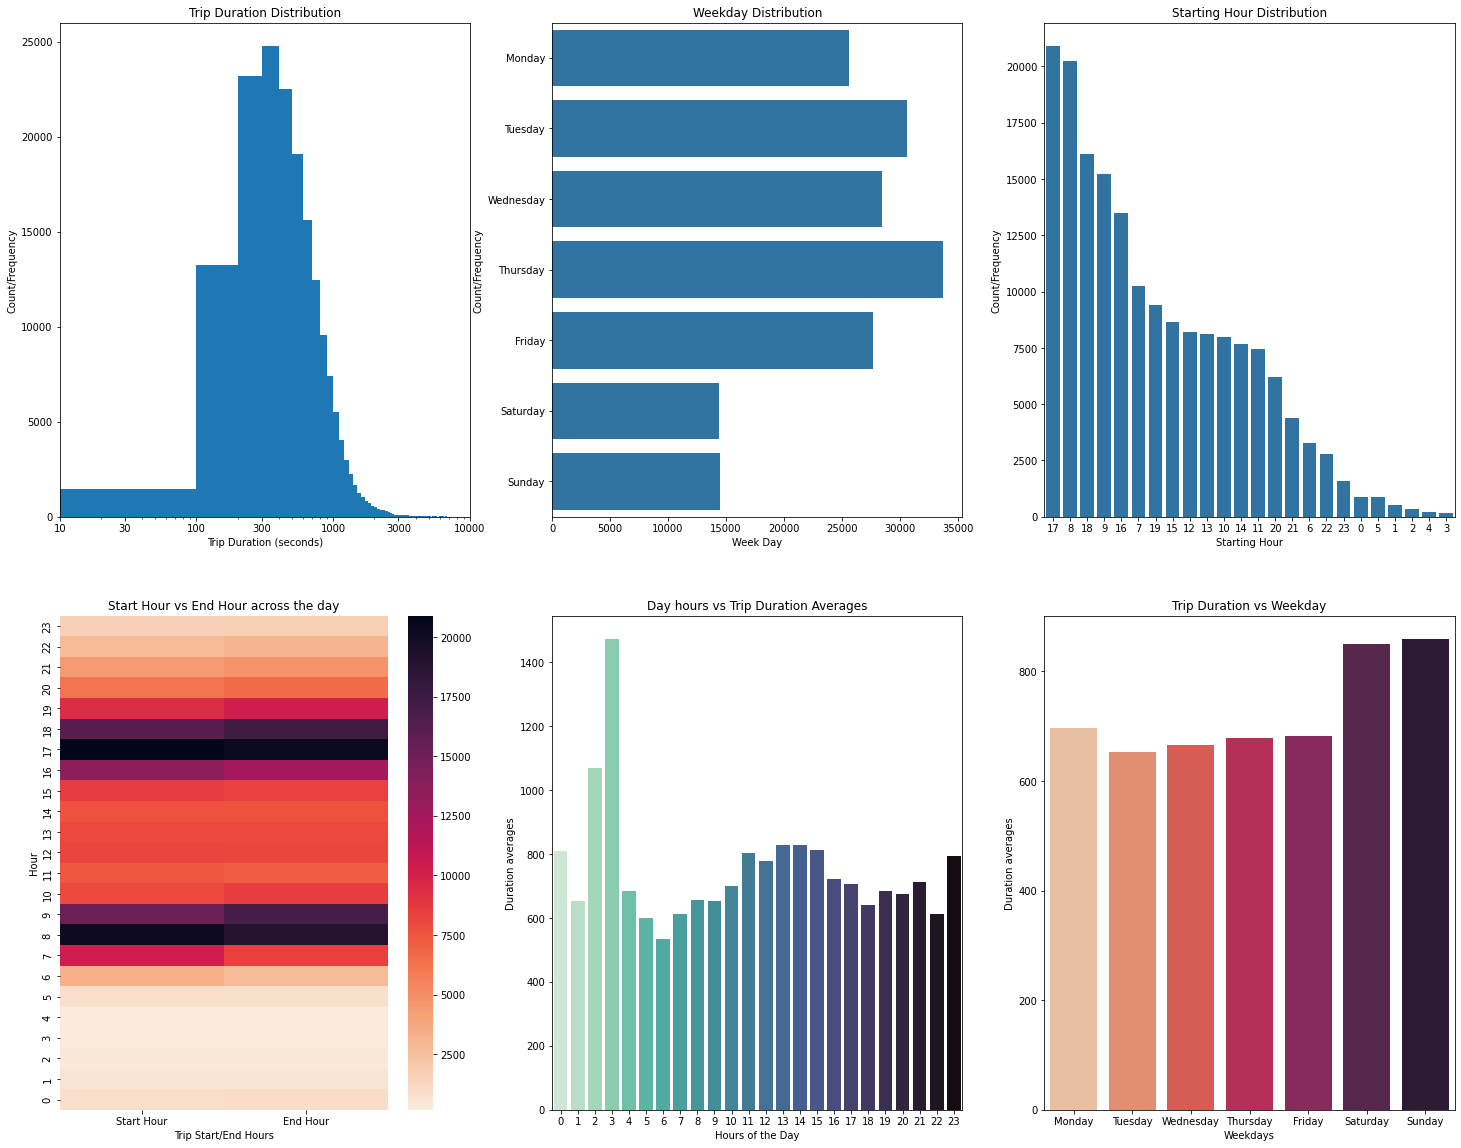

In [26]:
# fig, axes = plt.subplots(nrows=3, ncols=3)
plt.figure(figsize=[25,20])
plt.tight_layout()
plt.subplot(2,3,1)
plt.hist(data=bike_df, x='duration_sec', bins = np.arange(0, bike_df.duration_sec.max()+100, 100));
xticks = [10, 30, 100, 300, 1000, 3000, 10000]
plt.xscale('log')
plt.xlim(0,10000)
plt.xticks(xticks, xticks)
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Count/Frequency')
plt.title('Trip Duration Distribution')

plt.subplot(2,3,2)
bike_df["start_weekday"].replace({0: "Monday", 1: "Tuesday", 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}, inplace=True)
sb.countplot(data=bike_df, y='start_weekday', color = sb.color_palette()[0], order = days);
plt.xlabel('Week Day')
plt.ylabel('Count/Frequency')
plt.title('Weekday Distribution')

plt.subplot(2,3,3)
sb.countplot(data=bike_df, x='start_hour', color = sb.color_palette()[0], order = bike_df.start_hour.value_counts().index);
plt.xlabel('Starting Hour')
plt.ylabel('Count/Frequency')
plt.title('Starting Hour Distribution')

plt.subplot(2,3,4)
starthourdf = bike_df.start_hour.value_counts().reset_index().set_index('index').sort_index()
endhourdf = bike_df.end_hour.value_counts().reset_index().set_index('index').sort_index()
# print(starthourdf)
# starthourdf.start_hour = starthourdf.start_hour+endhourdf.end_hour
hours_df = starthourdf.join(endhourdf.end_hour)
hours_df = hours_df.iloc[::-1]
# print(hours_df)
sb.heatmap(hours_df, cmap='rocket_r', xticklabels = ['Start Hour', 'End Hour']);
plt.xlabel('Trip Start/End Hours')
plt.ylabel('Hour')
plt.title('Start Hour vs End Hour across the day')

plt.subplot(2,3,5)
duration_means = []
for x in range(0, 24):
    h = bike_df.loc[bike_df.start_hour == x]
    duration_means.append(h.duration_sec.mean())
# print(duration_means)
sb.barplot(list(range(0,24)), duration_means, palette='mako_r');
plt.xlabel('Hours of the Day')
plt.ylabel('Duration averages')
plt.title('Day hours vs Trip Duration Averages')

plt.subplot(2,3,6)
durationday_means = []
for x in days:
    h = bike_df.loc[bike_df.start_weekday == x]
    durationday_means.append(h.duration_sec.mean())
# print(durationday_means)
sb.barplot(days, durationday_means, palette='rocket_r');
plt.xlabel('Weekdays')
plt.ylabel('Duration averages');
plt.title('Trip Duration vs Weekday');

### From the previous visuals, we can see the distribution of trip duration: which shows a peak at around 6-minute-trips.
### Weekday distribution which shows that Thursday and Tuesday are the most common days and Saturday and Sunday are the least.
### Start hour distribution (which is very similar to end hour distribution as can be seen from the following graph) which shows that most trips occur between 8-9 am or 4-6pm
### Next is a heatmap showing the correlation between start and end hour across the day hours. They are almost identical which backs up the idea that most trips don't exceed an hour
### Trip duration vs hours of the day which notably shows an abnormal spike in 2-3am trips and a decrease in 6am trips 
### Trip duration vs weekdays which shows trips on Saturday and Sunday although less in number, average to be much longer than the rest. Possibly because these days coincide with non-working days for a lot of people.

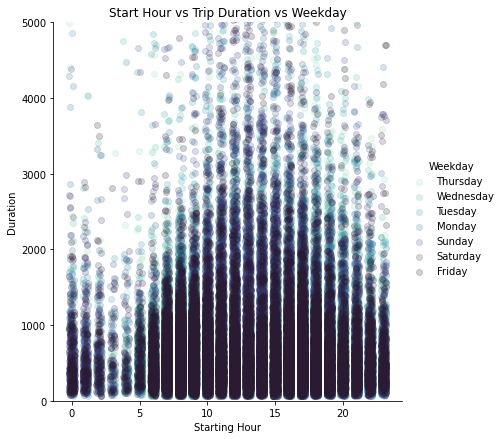

In [21]:
bike_df['Weekday'] = bike_df['start_weekday']
g = sb.FacetGrid(data=bike_df, hue='Weekday', height=6, palette = 'mako_r');
g.map(sb.regplot, 'start_hour', 'duration_sec', x_jitter=0.2, scatter_kws = {'alpha' : 1/5}, fit_reg=False);
g.set(ylim=(0,5000), xlabel = 'Starting Hour', ylabel='Duration', title='Start Hour vs Trip Duration vs Weekday');
g.add_legend();

### This plot shows that most short trips occur on later days of the week mostly regardless of start hour except the time interval between about 3 and 5 which seems to host less trips and on earlier weekdays. Most long trips also seem to be near the beginning of the week or the middle. 

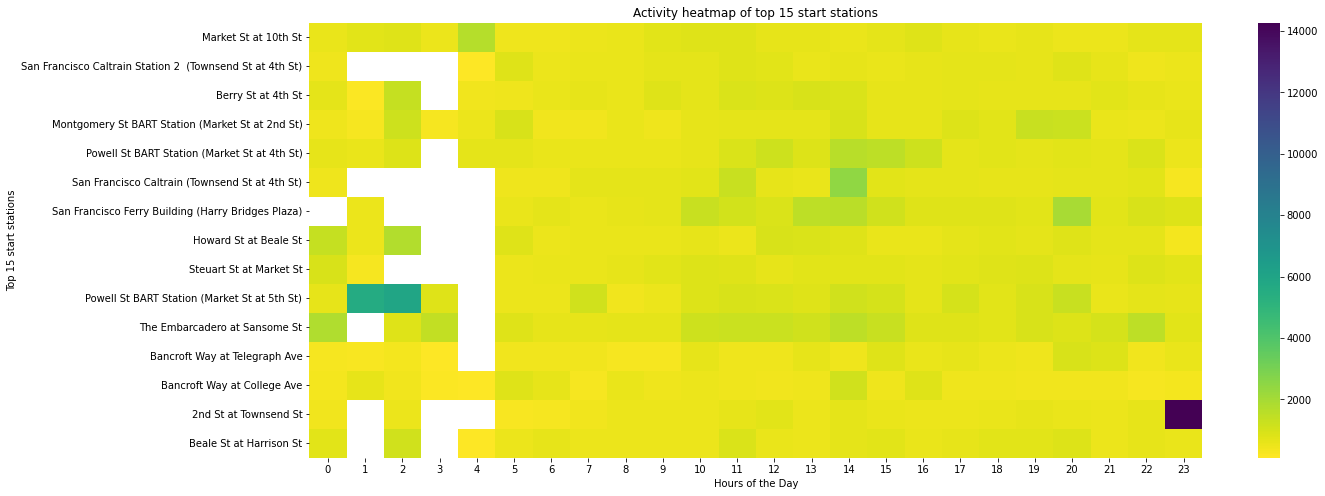

In [22]:
station_names = bike_df.start_station_name.value_counts().index[:15]
hours = list(range(0,24))
heatmap = []
for name in station_names:
    row =[ ]
    for hour in hours:
        df_sub = bike_df.loc[bike_df.start_station_name == name]
        df_sub2 = df_sub.loc[df_sub.start_hour == hour]
        row.append(df_sub2.duration_sec.mean())
    heatmap.append(row)
# print(heatmap)
heatmap_df = pd.DataFrame(heatmap).set_index(station_names)
plt.figure(figsize=[20,8])
sb.heatmap(heatmap_df, cmap='viridis_r');
plt.xlabel('Hours of the Day');
plt.ylabel('Top 15 start stations');
plt.title('Activity heatmap of top 15 start stations');

### In the top 15 stations, earlier hours of the day feature relatively low traffic with a few exceptions for one or 2 stations.
### In the top 15 stations, after 5am, activity becomes mostly uniform except for one super high spot at 11 pm at 2nd St.

### However, it should be noted that the last heatmap (2 observations) can be subject to heavy biased since some hours of the day have more data points surrounding them than others and also some of these stations might have most of their trips during a certain time interval of the day and have very few trips otherwise.

## Bike Usage through ids

> By inspecting the distribution of bike ids, I noticed a spike in a certain cluster of ids and I went on to investigate why.

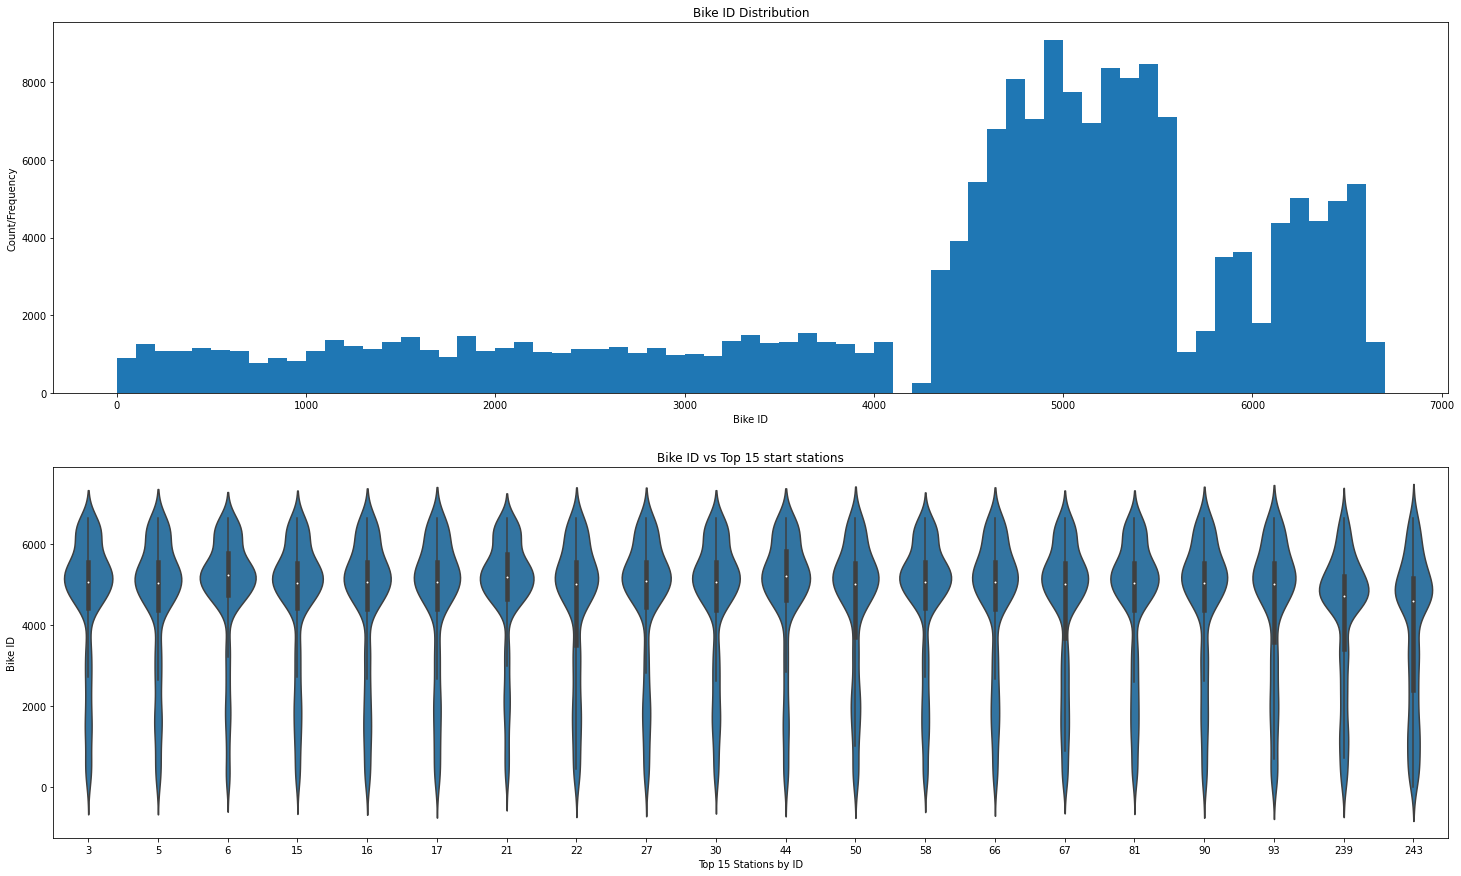

In [23]:
plt.figure(figsize=(25,15))
plt.subplot(2,1,1)
plt.hist(data=bike_df, x='bike_id', bins = np.arange(0, bike_df.bike_id.max()+100, 100));
plt.xlabel('Bike ID')
plt.ylabel('Count/Frequency')
plt.title('Bike ID Distribution')

plt.subplot(2,1,2)
start_names = bike_df.start_station_name.value_counts().index[:20]
bike_df_sub = bike_df.loc[bike_df.start_station_name.isin(start_names)]
sb.violinplot(data=bike_df_sub, x='start_station_id', y='bike_id', color=sb.color_palette()[0]);
plt.xlabel('Top 15 Stations by ID');
plt.ylabel('Bike ID');
plt.title('Bike ID vs Top 15 start stations');

### Certain bikes are used alot more than others and these bikes are usually linked to higher ids from around 5000+ and this is due to the fact that the most popular stations (top 20) all have bike ids around 5000

## Member Statistics & Metrics



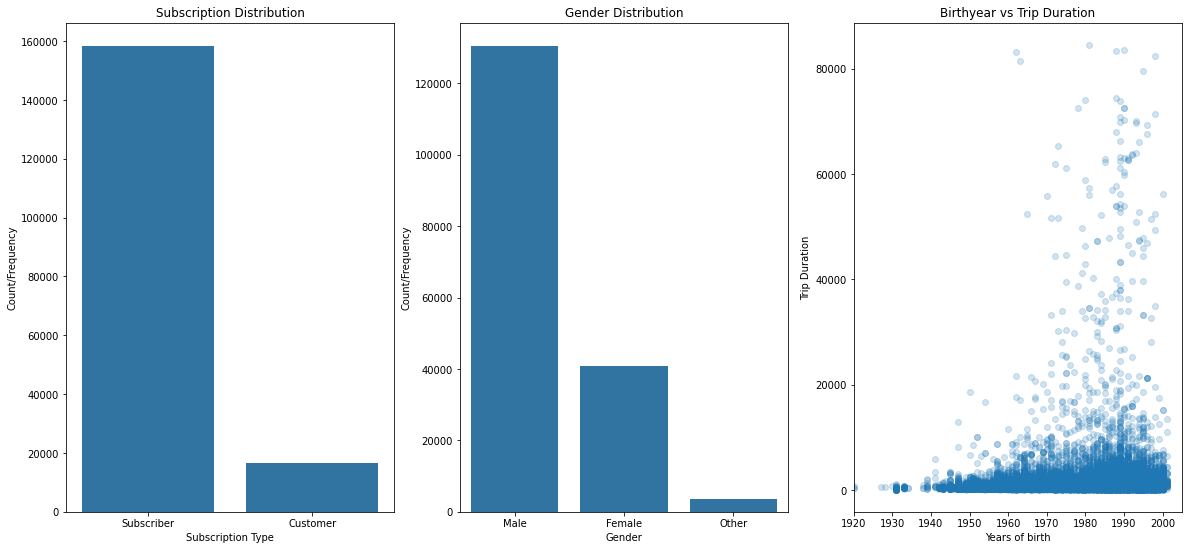

In [24]:
plt.figure(figsize=(20,9))
plt.subplot(1, 3, 1)
sb.countplot(data=bike_df, x='user_type', color=sb.color_palette()[0]);
plt.xlabel('Subscription Type')
plt.ylabel('Count/Frequency')
plt.title('Subscription Distribution')

plt.subplot(1,3,2)
sb.countplot(data=bike_df, x='member_gender', color=sb.color_palette()[0]);
plt.xlabel('Gender')
plt.ylabel('Count/Frequency')
plt.title('Gender Distribution')

plt.subplot(1,3,3)
plt.scatter(data=bike_df, x='member_birth_year', y='duration_sec', alpha=1/5);
plt.xlim(1920, 2005);
plt.xlabel('Years of birth')
plt.ylabel('Trip Duration');
plt.title('Birthyear vs Trip Duration');


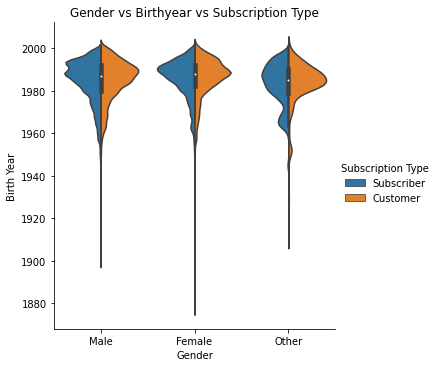

In [25]:
bike_df['Subscription Type'] = bike_df['user_type']
g = sb.catplot(data=bike_df, x="member_gender", y="member_birth_year",hue="Subscription Type", kind="violin", split=True,height=5);
g.set(xlabel='Gender', ylabel='Birth Year', title='Gender vs Birthyear vs Subscription Type');

### Users are mostly subscribers and are mostly men
### Male subscribers show a bimodal age distribution in comparison to unimodal male customers and subscribers feature more older users in the "Other" gender category

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!